In [1]:
import numpy as np
import os
import helpers
import pickle
from matplotlib import pyplot as plt
from scipy import signal
from sklearn import preprocessing


In [2]:
labels = helpers.load_data("trainLabels.npy", "train")

#Smartglasses
jins_accel = helpers.load_data("trainJinsAccelerometer.npy", "train")
jins_gyro = helpers.load_data("trainJinsGyroscope.npy", "train")

#Smartwatch
ms_accel = helpers.load_data("trainMSAccelerometer.npy", "train")
ms_gyro = helpers.load_data("trainMSGyroscope.npy", "train")

#Smartphone
nx_gravity = helpers.load_data("trainGravity.npy", "train")
nx_magnet = helpers.load_data("trainMagnetometer.npy", "train")
nx_linAcc = helpers.load_data("trainLinearAcceleration.npy", "train")
nx_accel = helpers.load_data("trainAccelerometer.npy", "train")
nx_gyro = helpers.load_data("trainGyroscope.npy", "train")

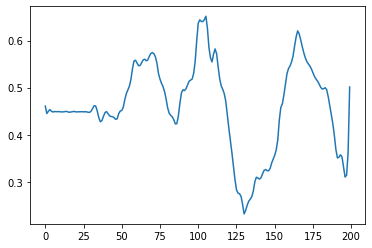

[[ 167    0    0]
 [ 167    1    0]
 [ 167    2    0]
 ...
 [1288  197    0]
 [1288  198    0]
 [1288  199    0]]


In [24]:
y = jins_accel[0,:,0]
x = np.arange(0, y.shape[0], 1)
plt.plot(x,y)
plt.show()

t = np.argwhere(np.isnan(jins_accel))
print(t)

In [3]:
jins_accel = helpers.preprocess_data(jins_accel, sampling_type="resample")
jins_gyro = helpers.preprocess_data(jins_gyro, "resample")
ms_accel = helpers.preprocess_data(ms_accel, "resamsple") #actually getting downsampled, but using resample instead of decimates
ms_gyro = helpers.preprocess_data(ms_gyro, "resample")
nx_gravity = helpers.preprocess_data(nx_gravity)
nx_magnet = helpers.preprocess_data(nx_magnet) #not getting resampled, but still needs other preprocessing steps
nx_linAcc = helpers.preprocess_data(nx_linAcc)
nx_accel = helpers.preprocess_data(nx_accel)
nx_gyro = helpers.preprocess_data(nx_gyro)


/home/wph/.local/lib/python3.8/site-packages/scipy/signal/_signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/home/wph/.local/lib/python3.8/site-packages/scipy/signal/_signaltools.py:1611: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
/home/wph/.local/lib/python3.8/site-packages/scipy/signal/_signaltools.py:1611: RuntimeWarning: invalid value encountered in true_divide
  res *= (1 - noise / lVar)


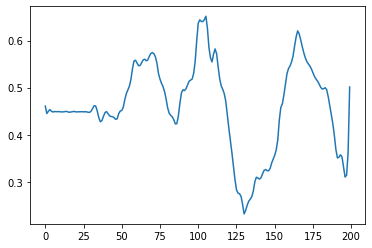

[[ 167    0    0]
 [ 167    1    0]
 [ 167    2    0]
 ...
 [1288  197    0]
 [1288  198    0]
 [1288  199    0]]


1600

In [20]:
y = jins_accel[0,:,0]
x = np.arange(0, y.shape[0], 1)
plt.plot(x,y)
plt.show()

t = np.argwhere(np.isnan(jins_accel))
print(t)
len(t)

In [4]:
train_data = np.stack((jins_gyro, ms_accel,ms_gyro, nx_gravity, nx_magnet, nx_linAcc, nx_accel, nx_gyro), axis = 1)

pickle.dump(train_data, open(r"data\train.pkl", "wb"))

pickle.dump(labels, open(r"data\labels.pkl", "wb"))